In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import sqlite3
from datetime import datetime


In [2]:
# ucitavanje podataka
df = pd.read_csv('data_base.csv', on_bad_lines='skip')
df.shape

(637, 12)

In [3]:
df.head()

,Date de début,Début,Motif du RDV,Notes,Date de saisie,Date de dernière mise à jour,Créé par,Statut,Date de naissance,Heure d'arrivée,Heure de prise en charge,Heure de départ
0,03/10/2023,20h00,Autre,NaN,2023-10-03T12:10:03.821+02:00,2023-10-03T12:11:58.646+02:00,Urgence 1 MMG,À venir,21/05/1962,NaN,NaN,NaN
1,03/10/2023,20h15,Autre,rdv prb psy\nrenouvellement ordo,2023-10-03T16:20:19.683+02:00,2023-10-03T16:21:44.927+02:00,SAS Ambulatoire MMG,À venir,06/12/1979,NaN,NaN,NaN
2,03/10/2023,20h30,Céphalées,RDV SAS37\nMaux de tête / fourmillement oreilles,2023-10-03T16:37:06.515+02:00,2023-10-03T22:11:40.325+02:00,SAS Ambulatoire MMG,Absent non excusé,17/02/2004,NaN,NaN,NaN
3,03/10/2023,20h45,Autre,rdv sas \ntirage intercostal,2023-10-03T18:18:17.038+02:00,2023-10-03T18:20:56.923+02:00,SAS Ambulatoire MMG,À venir,20/03/2022,NaN,NaN,NaN
4,03/10/2023,21h00,Autre,rdv sas \nenceinte 31 SA \nToux + fièvre et dl...,2023-10-03T18:41:20.589+02:00,2023-10-03T18:43:16.902+02:00,SAS Ambulatoire MMG,À venir,08/01/1996,NaN,NaN,NaN


In [4]:
df['Date de début']

0      03/10/2023
1      03/10/2023
2      03/10/2023
3      03/10/2023
4      03/10/2023
          ...    
632    30/12/2023
633    30/12/2023
634    30/12/2023
635    30/12/2023
636    30/12/2023
Name: Date de début, Length: 637, dtype: object

In [5]:
df['Date de début'] = pd.to_datetime(df['Date de début'], format='%d/%m/%Y')

In [6]:
date_counts = df['Date de début'].value_counts()

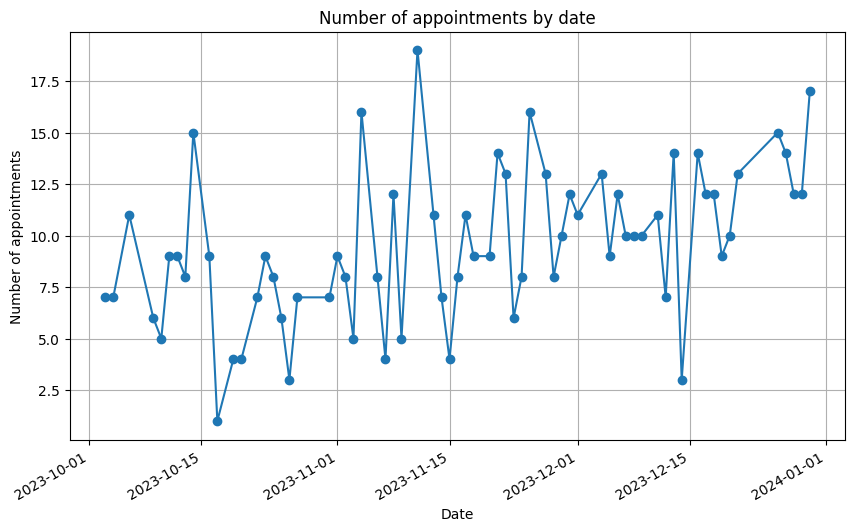

In [7]:
date_counts.plot(kind='line', figsize=(10, 6), marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Number of appointments')
plt.title('Number of appointments by date')
plt.grid(True)
plt.show()

In [8]:
df['Motif du RDV']

0                 Autre
1                 Autre
2             Céphalées
3                 Autre
4                 Autre
             ...       
632               Autre
633               Autre
634               Autre
635               Autre
636    Syndrôme grippal
Name: Motif du RDV, Length: 637, dtype: object

In [9]:
#check the number of each motif du RDV
motif_nombre = df['Motif du RDV'].value_counts()
motif_nombre

Motif du RDV
Autre                   338
Céphalées               223
Douleurs abdominales     43
Syndrôme grippal         33
Name: count, dtype: int64

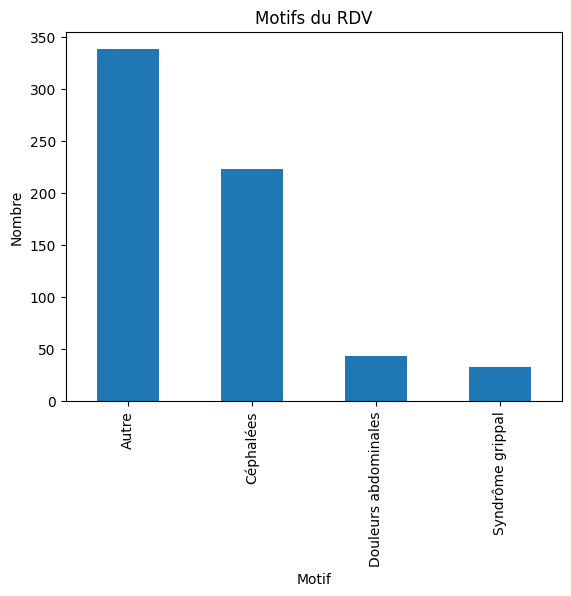

In [10]:
motif_nombre.plot(kind='bar')
plt.xlabel('Motif')
plt.ylabel('Nombre')
plt.title('Motifs du RDV')
plt.show()

In [11]:
df['Créé par']

0            Urgence 1 MMG
1      SAS Ambulatoire MMG
2      SAS Ambulatoire MMG
3      SAS Ambulatoire MMG
4      SAS Ambulatoire MMG
              ...         
632               SAMU MMG
633          Urgence 1 MMG
634          Urgence 1 MMG
635               SAMU MMG
636               SAMU MMG
Name: Créé par, Length: 637, dtype: object

In [12]:
#who created how many RDVs
df['Créé par'] = df['Créé par'].str.replace('MMG', '')
cree_nombre = df['Créé par'].value_counts()
cree_nombre

Créé par
SAMU                227
SAS Ambulatoire     226
Urgence 1           169
Médecins             15
Name: count, dtype: int64

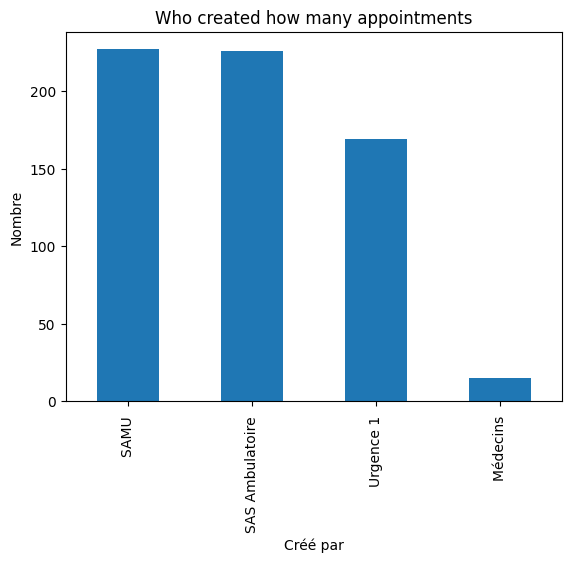

In [13]:
cree_nombre.plot(kind='bar')
plt.xlabel('Créé par')
plt.ylabel('Nombre')
plt.title('Who created how many appointments')
plt.show()

Text(0.5, 1.0, 'Créé par')

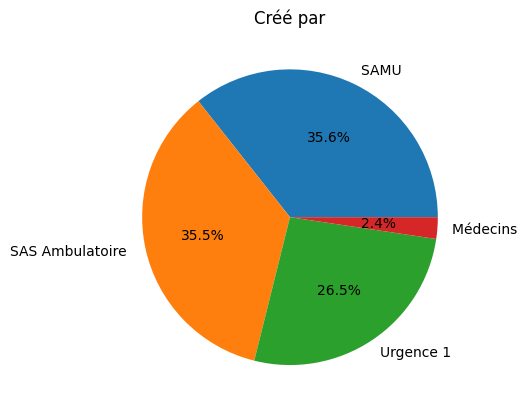

In [14]:
plt.pie(cree_nombre, labels=cree_nombre.index, autopct='%1.1f%%')
plt.title('Créé par')


In [15]:

#check the number of each motif du RDV
statut_nombre = df['Statut'].value_counts()
statut_nombre

Statut
À venir              383
Vu                   190
Absent non excusé     46
Absent excusé         18
Name: count, dtype: int64

Text(0.5, 1.0, 'Statut')

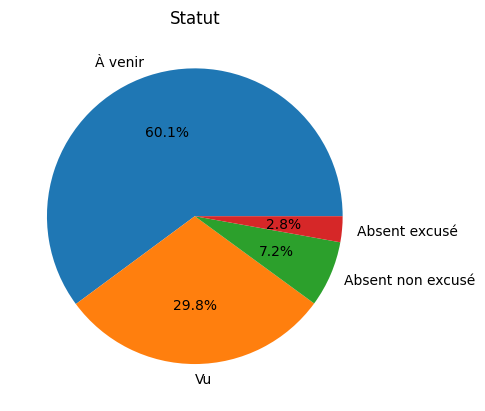

In [16]:
plt.pie(statut_nombre, labels=statut_nombre.index, autopct='%1.1f%%')
plt.title('Statut')

In [17]:
#function for showing a Créé par graph
def get_cree_par_graph():
   connection = sqlite3.connect('db.sqlite')
   cursor = connection.cursor()
   cursor.execute("SELECT name FROM sqlite_master WHERE type='table'")
   tables = cursor.fetchall()
   table_name = tables[0][0]
   df = pd.read_sql_query('SELECT "Créé par" FROM '+str(table_name), connection)
   df = df.copy()
   df['Créé par'] = df['Créé par'].str.replace('MMG', '')
   cree_counts = df['Créé par'].value_counts()
   plt.figure(figsize=(8, 8))
   plt.pie(cree_counts, labels=cree_counts.index, autopct='%1.1f%%')
   plt.title('Créé par')
   plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
   plt.show()

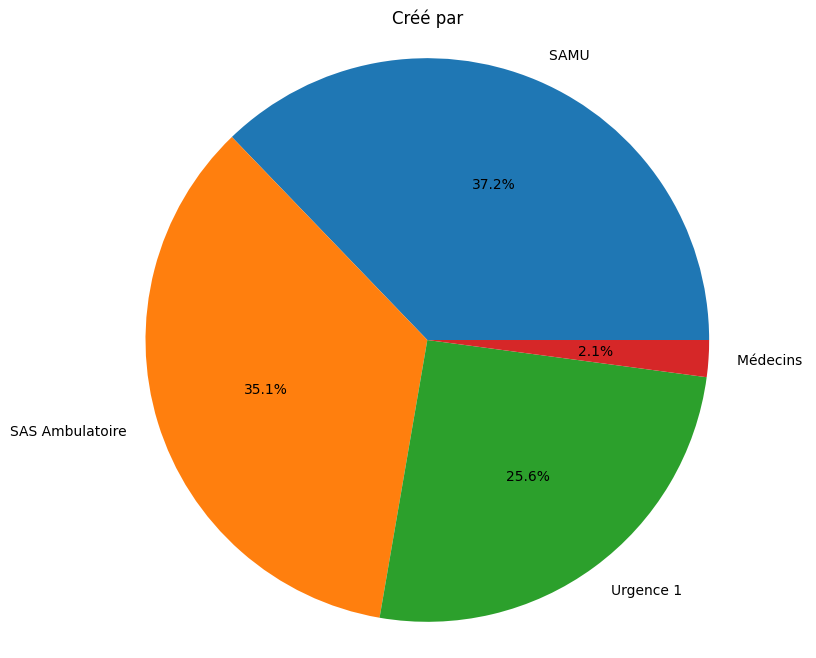

In [18]:
get_cree_par_graph()

In [19]:
#function for showing a Statut graph
def get_statut_graph():
   connection = sqlite3.connect('db.sqlite')
   cursor = connection.cursor()
   cursor.execute("SELECT name FROM sqlite_master WHERE type='table'")
   tables = cursor.fetchall()
   table_name = tables[0][0]
   df = pd.read_sql_query('SELECT "Statut" FROM '+str(table_name), connection)
   df = df.copy()
   statut_counts = df['Statut'].value_counts()
   plt.figure(figsize=(8, 8))
   plt.pie(statut_counts, labels=statut_counts.index, autopct='%1.1f%%')
   plt.title('Statut')
   plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
   plt.show()

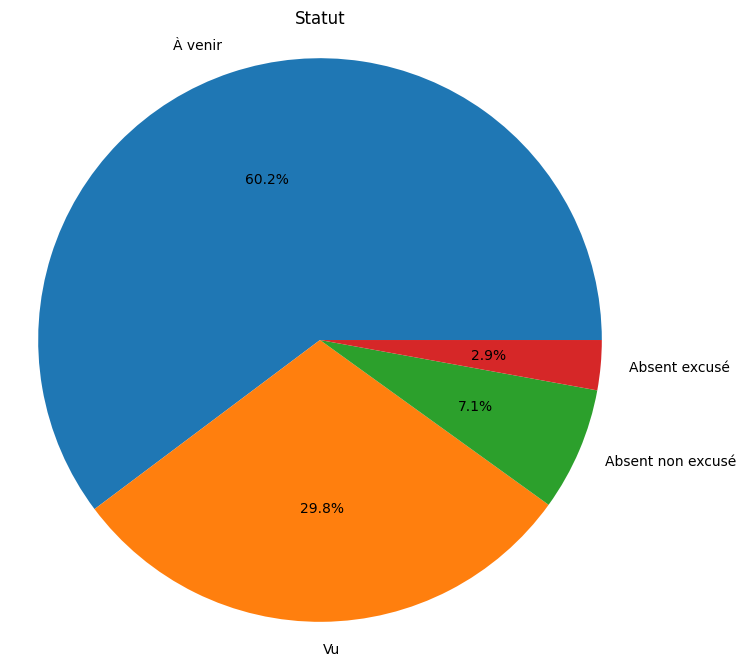

In [20]:
get_statut_graph()

In [21]:
#function for showing a Date de début graph
def get_date_de_début_graph():
   connection = sqlite3.connect('db.sqlite')
   cursor = connection.cursor()
   cursor.execute("SELECT name FROM sqlite_master WHERE type='table'")
   tables = cursor.fetchall()
   table_name = tables[0][0]
   df = pd.read_sql_query('SELECT "Date de début" FROM '+str(table_name), connection)
   df = df.copy()
   df['Date de début'] = pd.to_datetime(df['Date de début'], format='%d/%m/%Y')

   # Group by date and count the occurrences
   date_counts = df.groupby(df['Date de début'].dt.date).size()

   # Plot the graph
   plt.figure(figsize=(10, 6))
   plt.plot(date_counts.index, date_counts.values, marker='o', linestyle='-')
   plt.title('Date Frequency')
   plt.xlabel('Date')
   plt.ylabel('Frequency')
   plt.xticks(rotation=45)
   plt.grid(True)
   plt.tight_layout()
   plt.show()

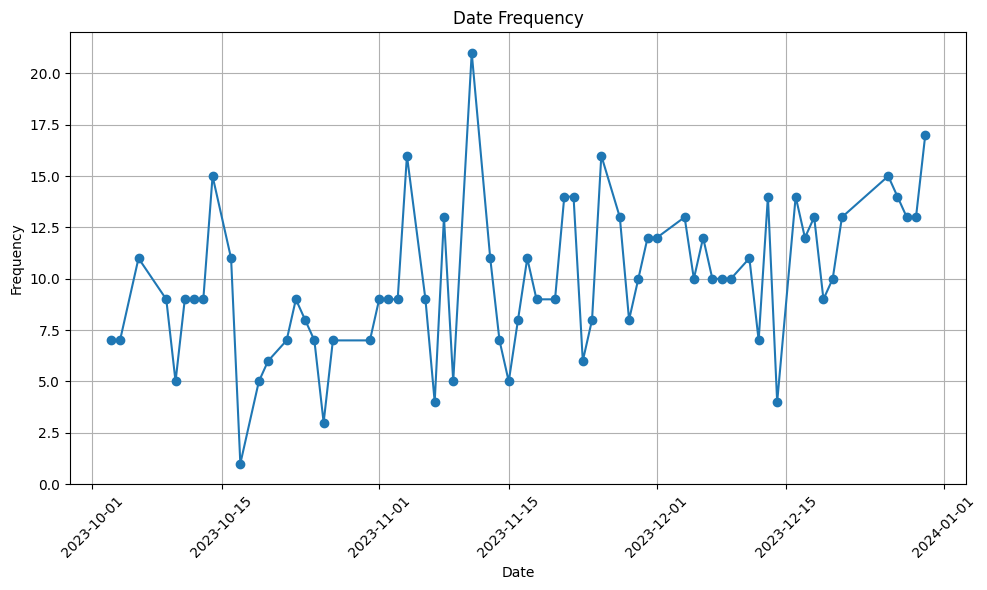

In [22]:
get_date_de_début_graph()

In [23]:
#function for showing a Motif du RDV graph
def get_motif_du_RDV_graph():
   connection = sqlite3.connect('db.sqlite')
   cursor = connection.cursor()
   cursor.execute("SELECT name FROM sqlite_master WHERE type='table'")
   tables = cursor.fetchall()
   table_name = tables[0][0]
   df = pd.read_sql_query('SELECT "Motif du RDV" FROM '+str(table_name), connection)
   df = df.copy()
   motif_counts = df['Motif du RDV'].value_counts()
   plt.figure(figsize=(8, 8))
   plt.pie(motif_counts, labels=motif_counts.index, autopct='%1.1f%%')
   plt.title('Motif du RDV')
   plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
   plt.show()

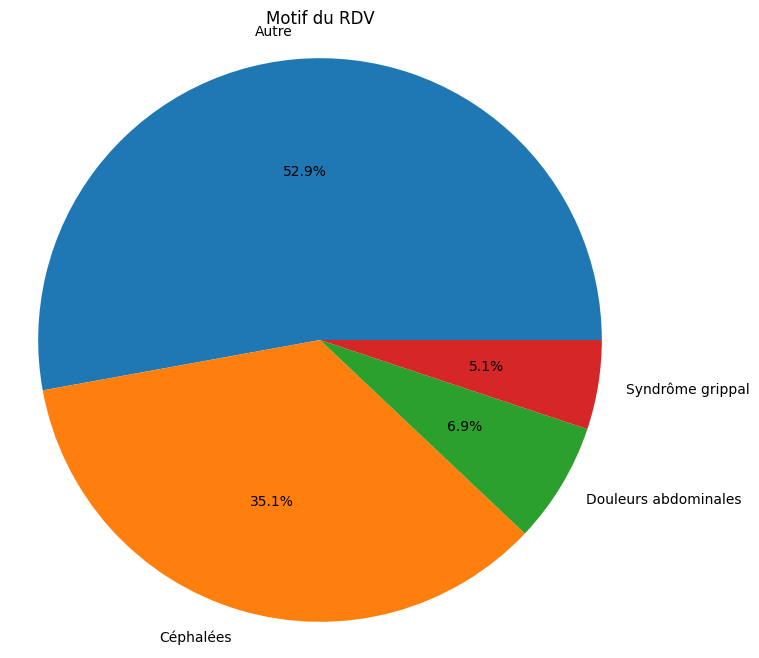

In [24]:
get_motif_du_RDV_graph()

In [25]:
#function for showing a Motif du RDV graph
def get_motif_du_RDV_bar_chart():
   connection = sqlite3.connect('db.sqlite')
   cursor = connection.cursor()
   cursor.execute("SELECT name FROM sqlite_master WHERE type='table'")
   tables = cursor.fetchall()
   table_name = tables[0][0]
   df = pd.read_sql_query('SELECT "Motif du RDV" FROM '+str(table_name), connection)
   df = df.copy()
   motif_counts = df['Motif du RDV'].value_counts()
   motif_counts.plot(kind='bar')
   plt.xlabel('Motif')
   plt.ylabel('Nombre')
   plt.title('Motifs du RDV')
   plt.show()

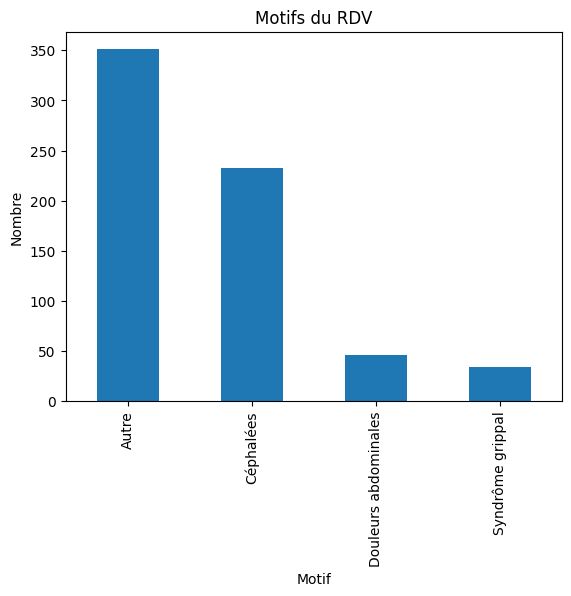

In [26]:
get_motif_du_RDV_bar_chart()

In [27]:
#function for showing a Date de naissance graph
def get_year_de_naissance_chart():
   connection = sqlite3.connect('db.sqlite')
   cursor = connection.cursor()
   cursor.execute("SELECT name FROM sqlite_master WHERE type='table'")
   tables = cursor.fetchall()
   table_name = tables[0][0]
   df = pd.read_sql_query('SELECT "Date de naissance" FROM '+str(table_name), connection)
   df = df.copy()

   #calculate age of each person
   today_str = datetime.today().strftime('%d%m%y')
   today = pd.to_datetime(today_str, format='%d%m%y')
   df['Date de naissance'] = pd.to_datetime(df['Date de naissance'], format='%d/%m/%Y')
   df['Age'] = df['Date de naissance'].apply(lambda x: today.year - x.year - ((today.month, today.day) < (x.month, x.day)))
   
   bins = [0, 6, 15.25, float('inf')]
   labels = ['Younger than 6', '6 to 15 years and 3 months', 'Adult']
   
   df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True, include_lowest=True)
   df['Age Group'] = pd.Categorical(df['Age Group'], categories=labels, ordered=True)

   age_group_counts = df['Age Group'].value_counts().sort_index()

   plt.figure(figsize=(8, 8))
   plt.pie(age_group_counts, labels=age_group_counts.index, autopct='%1.1f%%')
   plt.title('Age Group')
   plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
   plt.show()


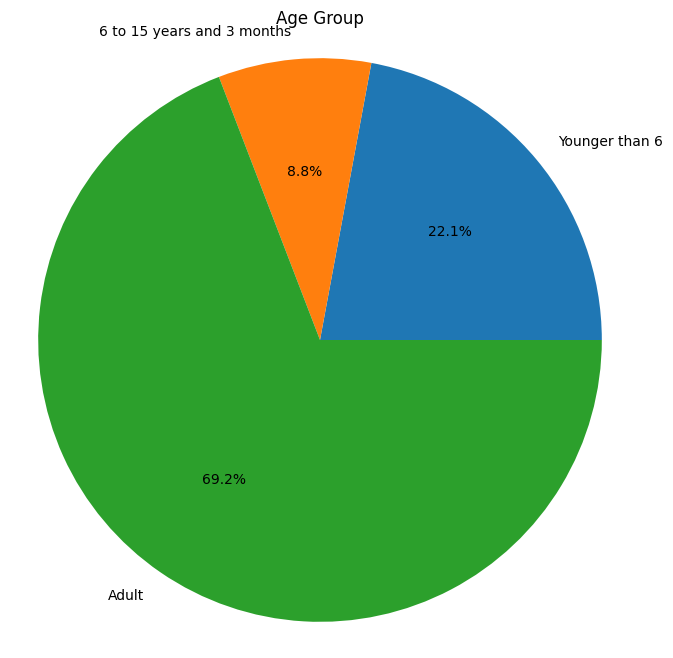

In [28]:
get_year_de_naissance_chart()

In [29]:
def get_pie_chart_filtered(column, start_date=None, end_date=None):
    connection = sqlite3.connect('db.sqlite')
    cursor = connection.cursor()
    cursor.execute("SELECT name FROM sqlite_master WHERE type='table'")
    tables = cursor.fetchall()
    table_name = tables[0][0]

    df = pd.read_sql_query('SELECT * FROM ' + table_name, connection)
    df = df.copy()

    df['Date de début'] = pd.to_datetime(df['Date de début'], format='%d/%m/%Y')

    if start_date is not None:
        start_date = datetime.strptime(start_date, '%d/%m/%Y').strftime('%Y-%m-%d')
        df = df[df['Date de début'] >= start_date]

    if end_date is not None:
        end_date = datetime.strptime(end_date, '%d/%m/%Y').strftime('%Y-%m-%d')
        df = df[df['Date de début'] <= end_date]

    if column == 'Créé par':
        df['Créé par'] = df['Créé par'].str.replace('MMG', '')
    counts = df[column].value_counts()

    plt.figure(figsize=(8, 8))
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
    plt.title(column)
    plt.axis('equal')
    plt.show()


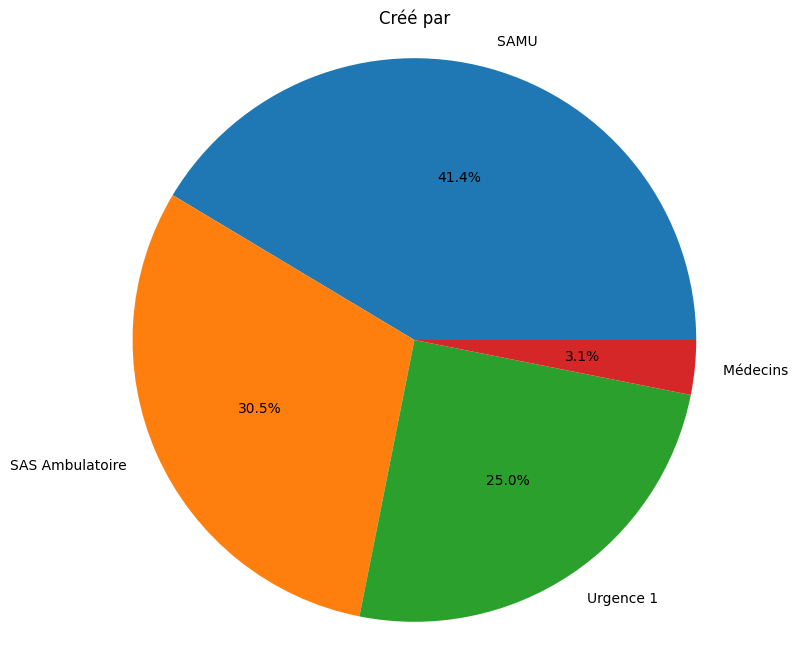

In [30]:
get_pie_chart_filtered('Créé par', start_date='01/11/2023', end_date='30/11/2023')

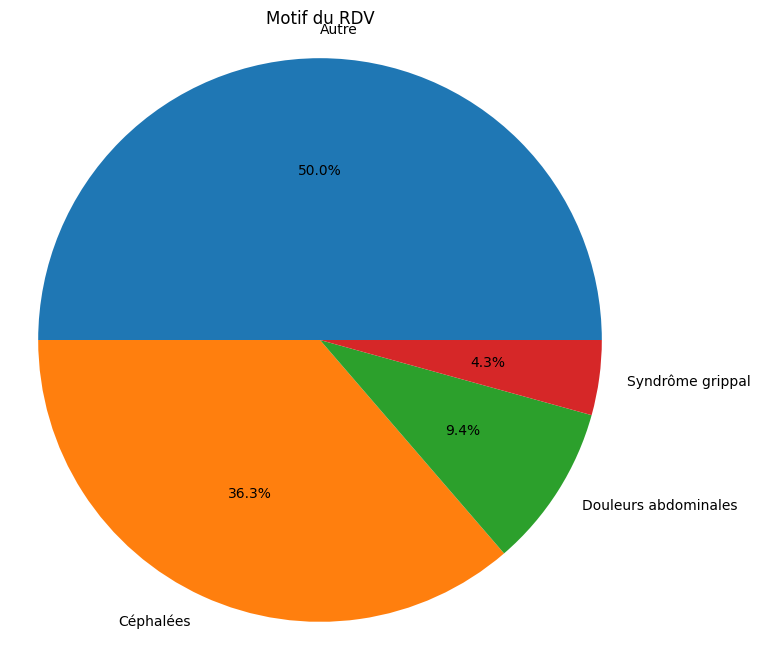

In [31]:
get_pie_chart_filtered('Motif du RDV', start_date='01/11/2023', end_date='30/11/2023')

In [32]:
def get_bar_chart_filtered(column, start_date=None, end_date=None):
    connection = sqlite3.connect('db.sqlite')
    cursor = connection.cursor()
    cursor.execute("SELECT name FROM sqlite_master WHERE type='table'")
    tables = cursor.fetchall()
    table_name = tables[0][0]

    df = pd.read_sql_query('SELECT * FROM ' + table_name, connection)
    df = df.copy()
    df['Date de début'] = pd.to_datetime(df['Date de début'], format='%d/%m/%Y')

    if start_date is not None:
        start_date = datetime.strptime(start_date, '%d/%m/%Y').strftime('%Y-%m-%d')
        df = df[df['Date de début'] >= start_date]

    if end_date is not None:
        end_date = datetime.strptime(end_date, '%d/%m/%Y').strftime('%Y-%m-%d')
        df = df[df['Date de début'] <= end_date]

    if column == 'Créé par':
        df['Créé par'] = df['Créé par'].str.replace('MMG', '')
    counts = df[column].value_counts()

    counts.plot(kind='bar')
    plt.xlabel(column)
    plt.ylabel('Nombre')
    plt.show()
    


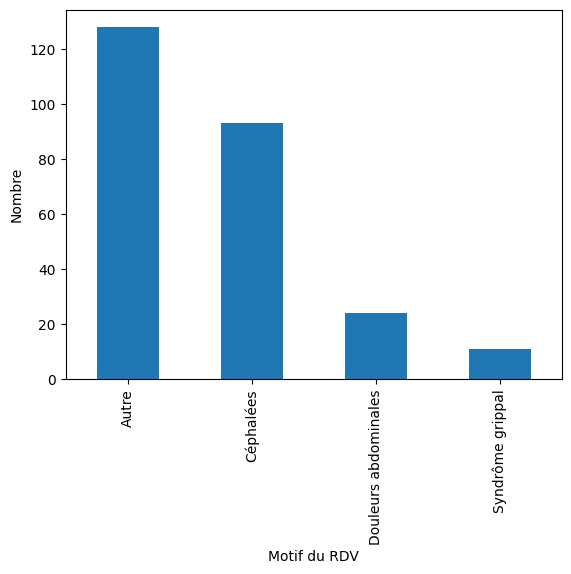

In [33]:
get_bar_chart_filtered('Motif du RDV', start_date='01/11/2023', end_date='30/11/2023')

In [34]:
def num_of_RDVs(start_date=None, end_date=None):
   connection = sqlite3.connect('db.sqlite')
   cursor = connection.cursor()
   cursor.execute("SELECT name FROM sqlite_master WHERE type='table'")
   tables = cursor.fetchall()
   table_name = tables[0][0]

   df = pd.read_sql_query('SELECT * FROM ' + table_name, connection)
   df = df.copy()
   df['Date de début'] = pd.to_datetime(df['Date de début'], format='%d/%m/%Y')

   if start_date is not None:
      start_date = datetime.strptime(start_date, '%d/%m/%Y').strftime('%Y-%m-%d')
      df = df[df['Date de début'] >= start_date]

   if end_date is not None:
      end_date = datetime.strptime(end_date, '%d/%m/%Y').strftime('%Y-%m-%d')
      df = df[df['Date de début'] <= end_date]
      
   #potential shifts
   colors_potential = []
   colors_covered = []
   potential = []
   unique_dates = df['Date de début'].unique()
   
   for day in unique_dates:
      day_of_week = day.weekday()

      if day_of_week == 5 or day_of_week == 6:
         potential.append(48)
         colors_potential.append('deepskyblue')
         colors_covered.append('blue')
      else:
         potential.append(16)
         colors_potential.append('aquamarine')
         colors_covered.append('mediumseagreen')
      
      
   covered = df.groupby('Date de début')['Début'].count()
      
   plt.figure(figsize=(14, 7))
   plt.bar(unique_dates, potential, color=colors_potential, label='Potential RDVs')
   plt.bar(unique_dates, covered, color=colors_covered, label='Covered RDVs')
   plt.legend(loc='best')
   plt.grid()
   plt.show()   

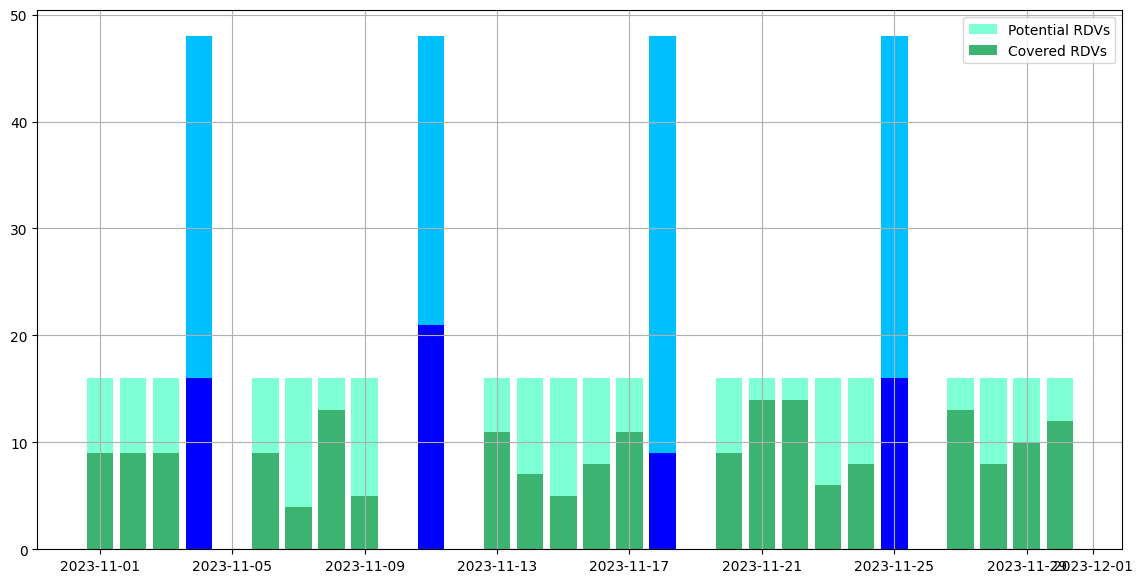

In [35]:
num_of_RDVs(start_date='01/11/2023', end_date='30/11/2023')

In [36]:
def num_of_RDVs_honored(start_date=None, end_date=None):
   connection = sqlite3.connect('db.sqlite')
   cursor = connection.cursor()
   cursor.execute("SELECT name FROM sqlite_master WHERE type='table'")
   tables = cursor.fetchall()
   table_name = tables[0][0]

   df = pd.read_sql_query('SELECT * FROM ' + table_name, connection)
   df = df.copy()
   df['Date de début'] = pd.to_datetime(df['Date de début'], format='%d/%m/%Y')

   if start_date is not None:
      start_date = datetime.strptime(start_date, '%d/%m/%Y').strftime('%Y-%m-%d')
      df = df[df['Date de début'] >= start_date]

   if end_date is not None:
      end_date = datetime.strptime(end_date, '%d/%m/%Y').strftime('%Y-%m-%d')
      df = df[df['Date de début'] <= end_date]
      
   taken = []
   absent = []
   unique_dates = df['Date de début'].unique()
   grouped = df.groupby('Date de début')
   
   for date, group in grouped:
      absent_cnt = (group['Statut'] == 'Absent non excusé').sum()
      absent.append(absent_cnt)
      taken_cnt = (group['Statut'] != 'Absent non excusé').sum()
      taken.append(taken_cnt)
      
      
   plt.figure(figsize=(14, 7))
   plt.bar(unique_dates, taken, color='aquamarine', label='RDVs taken')
   plt.bar(unique_dates, absent, color='mediumseagreen', label='RDVs absent')
   plt.legend(loc='best')
   plt.grid()
   plt.show()   


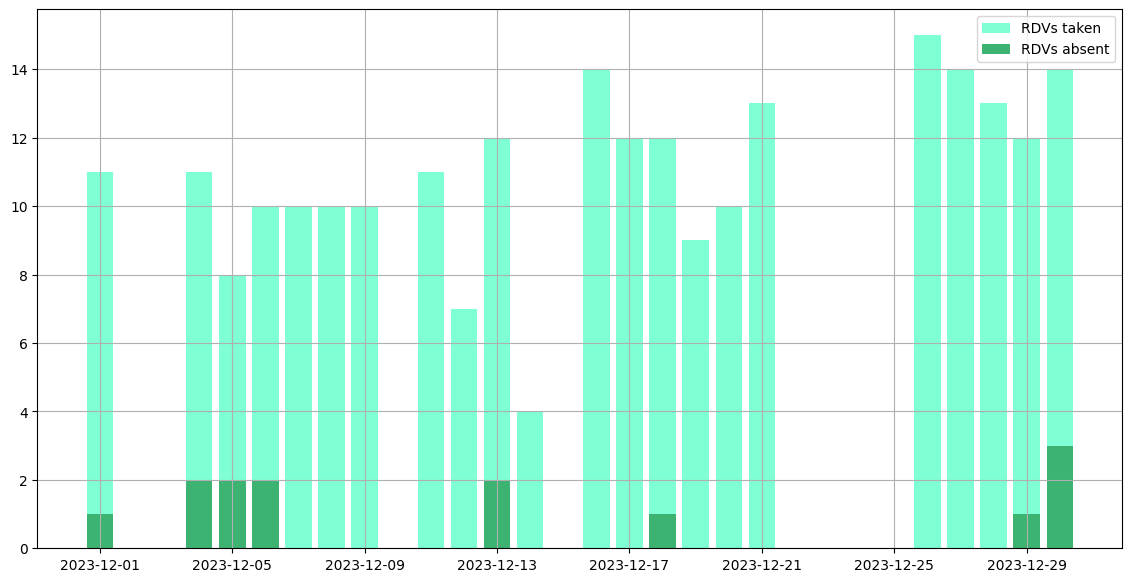

In [37]:
num_of_RDVs_honored(start_date='01/12/2023', end_date='30/12/2023')

In [42]:
def shifts(start_date=None, end_date=None):
   from prettytable import PrettyTable
   
   connection = sqlite3.connect('db.sqlite')
   cursor = connection.cursor()
   cursor.execute("SELECT name FROM sqlite_master WHERE type='table'")
   tables = cursor.fetchall()
   table_name = tables[0][0]

   df = pd.read_sql_query('SELECT * FROM ' + table_name, connection)
   df = df.copy()
   df['Date de début'] = pd.to_datetime(df['Date de début'], format='%d/%m/%Y')

   if start_date is not None:
      start_date = datetime.strptime(start_date, '%d/%m/%Y').strftime('%Y-%m-%d')
      df = df[df['Date de début'] >= start_date]

   if end_date is not None:
      end_date = datetime.strptime(end_date, '%d/%m/%Y').strftime('%Y-%m-%d')
      df = df[df['Date de début'] <= end_date]
      
   table = PrettyTable()
   table.field_names = ['Month', 'Potential shifts number', 'Covered shifts number', 'Percentage']
   
   df['Month'] = df['Date de début'].dt.to_period('M')
   grouped = df.groupby('Month')
   
   potential = {}
   covered = {}
   
   for month, group in grouped:
      potential[month] = []
      covered[month] = []
      
      df['Days'] = group['Date de début'].dt.to_period('D')
      days = df.groupby('Days')
      df['Début'] = pd.to_datetime(df['Début'], format='%Hh%M')

      month_range = pd.date_range(start=month.start_time, end=month.end_time, freq='D')
      missing = month_range.difference(group['Date de début'])
      
      for day in month_range:
         if day in missing:
            if day.weekday() == 5 or day.weekday() == 6:
               potential[month].append(3)
            else:
               potential[month].append(1)
         else:
            day_of_week = day.weekday()
            if day_of_week == 5 or day_of_week == 6:
               potential[month].append(3)
               day_group = df[df['Date de début'] == day]
               
               x = 0
               hour = day_group['Début'].dt.hour
               if (hour >= 12).any() and (hour < 16).any():
                  x += 1
               if (hour >= 16).any() and (hour < 20).any():
                  x += 1
               if (hour >= 20).any() and (hour < 24).any():
                  x += 1
               covered[month].append(x)
            else:
               covered[month].append(1)
               potential[month].append(1)
               
      row = [month, sum(potential[month]), sum(covered[month]), np.round(sum(covered[month])/sum(potential[month]), 2)]
      table.add_row(row)
   
   print(table)
               
               


In [43]:
shifts()

+---------+-------------------------+-----------------------+------------+
|  Month  | Potential shifts number | Covered shifts number | Percentage |
+---------+-------------------------+-----------------------+------------+
| 2023-10 |            49           |           20          |    0.41    |
| 2023-11 |            46           |           26          |    0.57    |
| 2023-12 |            51           |           22          |    0.43    |
+---------+-------------------------+-----------------------+------------+
